In [2016]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [2017]:
train=pd.read_csv('./train_users_2.csv')
test=pd.read_csv('./test_users.csv')


In [2018]:
df_all=pd.concat((train,test),axis=0,ignore_index=True)

In [2019]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [2020]:
#summary stats

In [2021]:
df_all.describe()

,age,signup_flow,timestamp_first_active
count,158681.000000,275547.000000,2.755470e+05
mean,47.145310,4.291965,2.013310e+13
std,142.629468,8.794313,9.146438e+09
min,1.000000,0.000000,2.009032e+13
25%,28.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,2.014010e+13
75%,42.000000,1.000000,2.014062e+13
max,2014.000000,25.000000,2.014093e+13


In [2022]:
#convert year to age and create a range

In [2023]:
df_all.loc[df_all['age']>1000]['age'].describe()

count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [2024]:
df_year=df_all['age']>1000
df_all.loc[df_year,'age']=2015-df_all.loc[df_year,'age']

In [2025]:
df_all.loc[df_year,'age'].describe()

count    828.000000
mean       7.882850
std       22.219408
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       95.000000
Name: age, dtype: float64

In [2026]:
df_all.loc[df_all.age > 60, 'age'] = np.nan
df_all.loc[df_all.age < 18, 'age'] = np.nan

In [2027]:
#DATA VISUALISATIONS 

In [2028]:
#Age Distribution

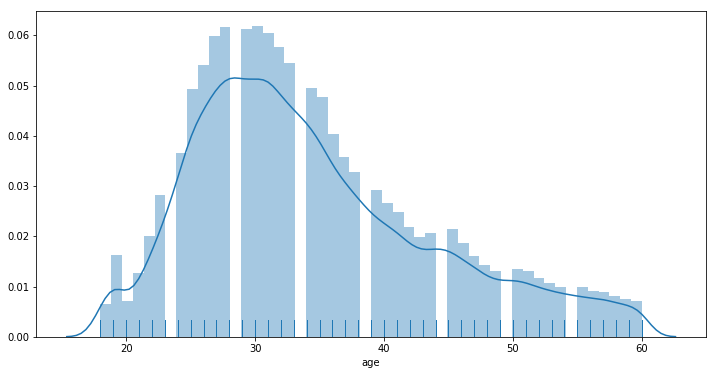

In [2029]:
plt.figure(figsize=(12,6))
sns.distplot(df_all.age.dropna(),rug=True)
plt.show()

In [2030]:
#Gender Distribution

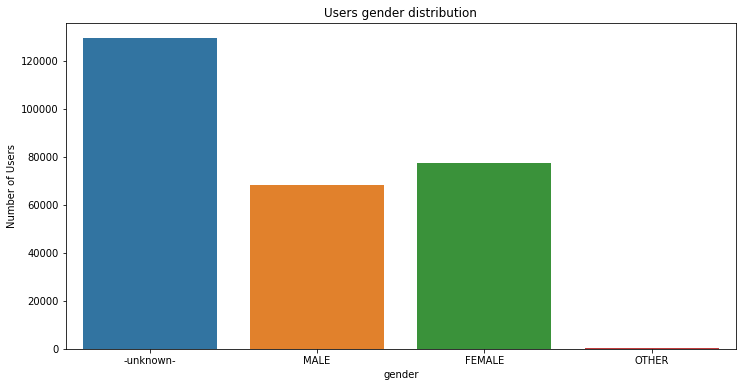

In [2031]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender',data=df_all)
plt.ylabel('Number of Users')
plt.title('Users gender distribution')
plt.show()

In [2032]:
#Country Distribution

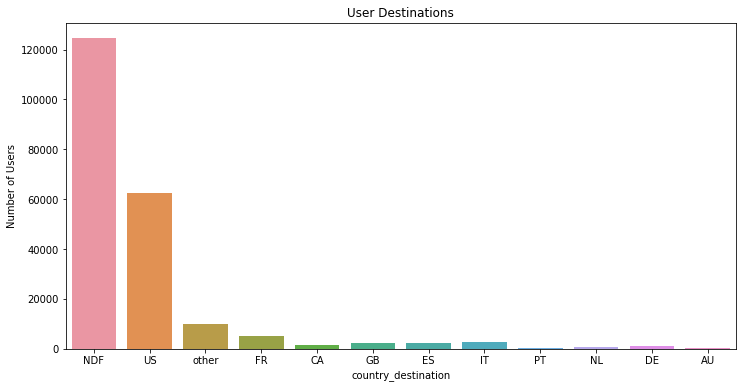

In [2033]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_all)
plt.ylabel('Number of Users')
plt.title('User Destinations')
plt.show()

In [2034]:
# Destination vs Age

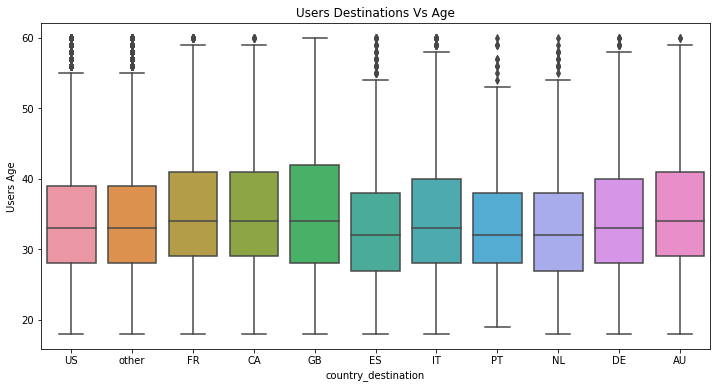

In [2035]:
plt.figure(figsize=(12,6))
df_without_ndf=df_all[df_all['country_destination']!='NDF']
sns.boxplot(y='age', x='country_destination',data=df_without_ndf)
plt.ylabel('Users Age')
plt.title('Users Destinations Vs Age')
plt.show()

In [2036]:
#Signup Method Distribution

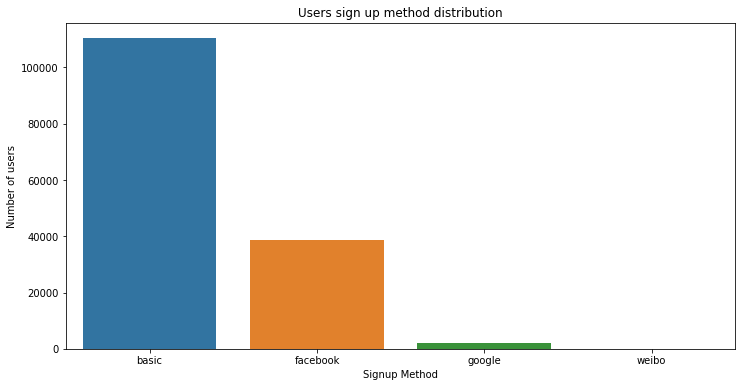

In [2037]:
plt.figure(figsize=(12,6))
sns.countplot(x='signup_method', data = df_without_ndf)
plt.xlabel('Signup Method')
plt.ylabel('Number of users')
plt.title('Users sign up method distribution')
plt.show()

In [2038]:
#Signup Method vs Destinations

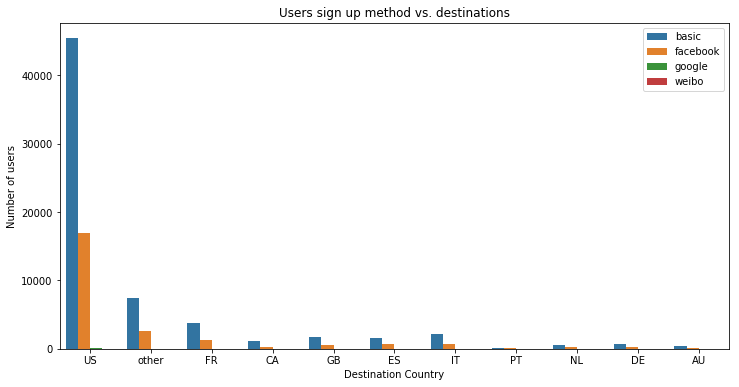

In [2039]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data = df_without_ndf, hue = 'signup_method')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method vs. destinations')
plt.legend(loc='upper right')
plt.show()

In [2040]:
#Signup App Distribution

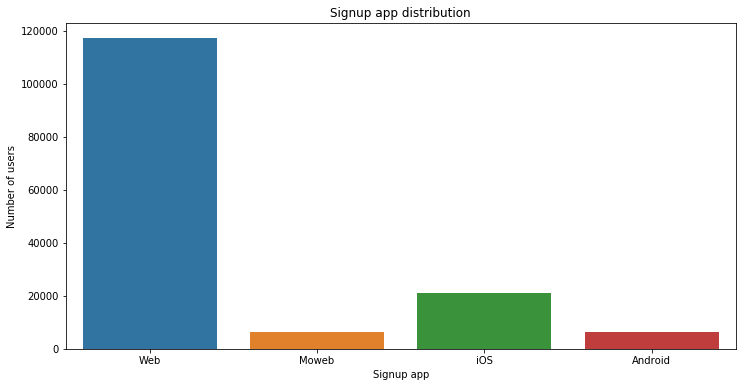

In [2041]:
plt.figure(figsize=(12,6))
sns.countplot(x='signup_app', data=df_without_ndf)
plt.xlabel('Signup app')
plt.ylabel('Number of users')
plt.title('Signup app distribution')
plt.show()

In [2042]:
#Users destination based on Signup App

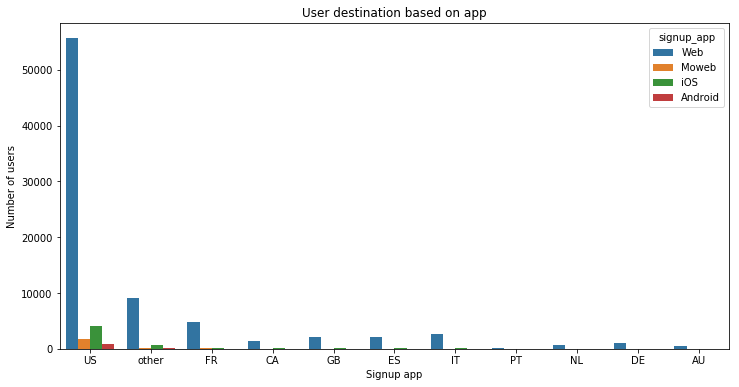

In [2043]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_ndf,hue='signup_app')
plt.xlabel('Signup app')
plt.ylabel('Number of users')
plt.title('User destination based on app')
plt.show()

In [2044]:
#Affilate Chanel Distribution

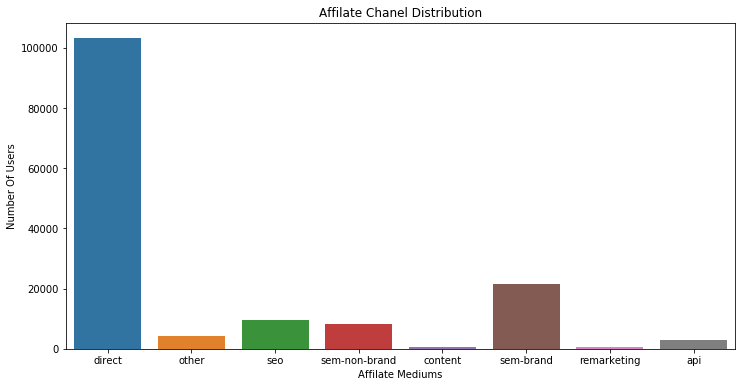

In [2045]:
plt.figure(figsize=(12,6))
sns.countplot(x='affiliate_channel',data=df_without_ndf)
plt.xlabel('Affilate Mediums')
plt.ylabel('Number Of Users')
plt.title('Affilate Chanel Distribution')
plt.show()

In [2046]:
#formatting the dates correctly

In [2047]:
df_all['date_account_created']=pd.to_datetime(df_all['date_account_created'],format='%Y-%m-%d')
df_all['timestamp_first_active']=pd.to_datetime(df_all['timestamp_first_active'],format='%Y%m%d%H%M%S')

In [2048]:
df_all['date_account_created'].fillna(df_all.timestamp_first_active,inplace=True)

In [2049]:
df_all.drop('date_first_booking',axis=1,inplace=True)

In [2050]:
#extract days, months and year from dates

In [2051]:
df_all['acc_year']=df_all['date_account_created'].dt.year
df_all['acc_month']=df_all['date_account_created'].dt.month
df_all['acc_day']=df_all['date_account_created'].dt.day

In [2052]:
df_all['first_active_year']=df_all['timestamp_first_active'].dt.year
df_all['first_active_month']=df_all['timestamp_first_active'].dt.month
df_all['first_active_day']=df_all['timestamp_first_active'].dt.day

In [2053]:
#filling in missing values for each variable

In [2054]:
df_all['age']=df_all['age'].fillna(method='ffill')

In [2055]:
#filling in last nan age since the previous method missed one

In [2056]:
df_all['age']=df_all['age'].fillna(df_all['age'].median())

In [2057]:
df_all['first_affiliate_tracked']=df_all['first_affiliate_tracked'].fillna('untracked')

In [2058]:
#Replace '-unkown' with nan values and fill in the missing values with ffill

In [2059]:
df_all.gender.replace("-unknown-", np.nan, inplace=True)

In [2060]:
df_all['gender']=df_all['gender'].fillna(method='ffill')

In [2061]:
#filling in last nan variable 

In [2062]:
df_all['gender']=df_all['gender'].fillna('FEMALE')

In [2063]:
#replace 'NDF' with nan values

In [2064]:
#df_all.country_destination.replace("NDF",np.nan,inplace=True)

In [2065]:
df_all['country_destination']=df_all['country_destination'].fillna(method='ffill')

In [2066]:
df_all['country_destination']=df_all['country_destination'].fillna('US')

In [2067]:
#CHECK TO SEE ZERO NULL VALUES

In [2068]:
df_all.isnull().sum()

affiliate_channel          0
affiliate_provider         0
age                        0
country_destination        0
date_account_created       0
first_affiliate_tracked    0
first_browser              0
first_device_type          0
gender                     0
id                         0
language                   0
signup_app                 0
signup_flow                0
signup_method              0
timestamp_first_active     0
acc_year                   0
acc_month                  0
acc_day                    0
first_active_year          0
first_active_month         0
first_active_day           0
dtype: int64

In [2069]:
#Feature Engineering

In [2070]:
df_all.age.dtype

dtype('float64')

In [2071]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [2072]:
cat_features = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser','country_destination']

In [2073]:
label_encoder=LabelEncoder()

In [2074]:
encoded=df_all[cat_features].apply(label_encoder.fit_transform)

In [2075]:
df_cols=['id','acc_year','acc_month','acc_day','first_active_year','first_active_month','first_active_day','age','signup_flow']

In [2076]:
df_all=df_all[df_cols].join(encoded)

In [2077]:
df_all.head()

,id,acc_year,acc_month,acc_day,first_active_year,first_active_month,first_active_day,age,signup_flow,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010,6,28,2009,3,19,32.0,0,0,1,6,2,4,6,2,3,8,7
1,820tgsjxq7,2011,5,25,2009,5,23,38.0,0,1,1,6,7,8,6,2,3,8,7
2,4ft3gnwmtx,2010,9,28,2009,6,9,56.0,3,0,0,6,2,4,6,2,6,22,10
3,bjjt8pjhuk,2011,12,5,2009,10,31,42.0,0,0,1,6,2,4,6,2,3,17,11
4,87mebub9p4,2010,9,14,2009,12,8,41.0,0,0,0,6,2,4,6,2,3,8,10


In [2078]:
#one hot encoding

In [2079]:
ohe_features = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel',
             'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in ohe_features:
    df_all_dummy = pd.get_dummies(df_all[f], prefix=f)
    df_all = df_all.drop([f], axis=1)
    df_all = pd.concat((df_all, df_all_dummy), axis=1)

In [2080]:
df_all.dtypes

id                      object
acc_year                 int64
acc_month                int64
acc_day                  int64
first_active_year        int64
first_active_month       int64
first_active_day         int64
age                    float64
country_destination      int64
gender_0                 uint8
gender_1                 uint8
gender_2                 uint8
signup_method_0          uint8
signup_method_1          uint8
signup_method_2          uint8
signup_method_3          uint8
signup_flow_0            uint8
signup_flow_1            uint8
signup_flow_2            uint8
signup_flow_3            uint8
signup_flow_4            uint8
signup_flow_5            uint8
signup_flow_6            uint8
signup_flow_8            uint8
signup_flow_10           uint8
signup_flow_12           uint8
signup_flow_14           uint8
signup_flow_15           uint8
signup_flow_16           uint8
signup_flow_20           uint8
                        ...   
first_browser_25         uint8
first_br

In [1993]:
#creating training set

In [1994]:
df_all.set_index('id', inplace=True)

In [1995]:
train_df = df_all.loc[train['id']]

In [1996]:
train_df.reset_index(inplace=True)

In [1997]:
train_df.head()

,id,acc_year,acc_month,acc_day,first_active_year,first_active_month,first_active_day,age,country_destination,gender_0,...,first_browser_45,first_browser_46,first_browser_47,first_browser_48,first_browser_49,first_browser_50,first_browser_51,first_browser_52,first_browser_53,first_browser_54
0,gxn3p5htnn,2010,6,28,2009,3,19,32.0,7,1,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011,5,25,2009,5,23,38.0,7,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010,9,28,2009,6,9,56.0,10,1,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011,12,5,2009,10,31,42.0,11,1,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010,9,14,2009,12,8,41.0,10,1,...,0,0,0,0,0,0,0,0,0,0


In [1998]:
#Creating Testing Set

In [1999]:
test_df = df_all.loc[test['id']]
test_df.reset_index(inplace=True)
id_test = test_df['id']

In [2000]:
test_df.head()

,id,acc_year,acc_month,acc_day,first_active_year,first_active_month,first_active_day,age,country_destination,gender_0,...,first_browser_45,first_browser_46,first_browser_47,first_browser_48,first_browser_49,first_browser_50,first_browser_51,first_browser_52,first_browser_53,first_browser_54
0,5uwns89zht,2014,7,1,2014,7,1,35.0,7,1,...,0,0,0,0,0,0,0,0,0,0
1,jtl0dijy2j,2014,7,1,2014,7,1,35.0,7,1,...,0,0,0,0,0,0,0,0,0,0
2,xx0ulgorjt,2014,7,1,2014,7,1,35.0,7,1,...,0,0,0,0,0,0,0,0,0,0
3,6c6puo6ix0,2014,7,1,2014,7,1,35.0,7,1,...,0,0,0,0,0,0,0,0,0,0
4,czqhjk3yfe,2014,7,1,2014,7,1,35.0,7,1,...,0,0,0,0,0,0,0,0,0,0


In [2001]:
#Train Test splot

In [2002]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2003]:
labels=train_df.country_destination.values

In [2004]:
X_train = StandardScaler().fit_transform(train_df.drop(['country_destination','id'],axis=1))
y_train = train_df['country_destination'].values
X_test = StandardScaler().fit_transform(test_df.drop(['country_destination','id'],axis=1))

In [2005]:
X_test.shape,X_train.shape,y_train.shape

((62096, 159), (213451, 159), (213451,))

In [2006]:
#Splitting train and test
vals = df_all.values
X = vals[:train_df.shape[0]]
y = labels  
X_test = vals[train_df.shape[0]:]

In [2007]:
#model

In [2008]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)                  


In [2009]:
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=0.5, verbosity=1)

In [2010]:
#Prediction
y_pred = xgb.predict_proba(X_test)

In [2011]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [2012]:
#Generate submission
pred = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
pred.head()

,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,IT


In [2013]:
pred.to_csv('./word.csv',header=True,index=False)